## Data Introduction

In this notebook, we are going to analyze avocado sales across the U.S. and then specifically in California. This labs priamry purpose is to practice with various data wrangling techniques.

In [3]:
#Load Package(s)
from plotnine import *
from numpy import *
from pandas import *
#Load in Data
avocadodata = read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Labs\Lab_2\avocado-updated-2020.csv")
avocadodata.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


This dataset contains historical data on small/large/xl avocado prices and sales volume from multiple cities, states, and regions in the USA. The data includes records from 2015-2020.

In [61]:
#Rename columns from numbers to Small_avo, Large_avo, and XL_avo
avocado_clean = avocadodata.rename(columns={"4046":"small_avo"})
avocado_clean = avocadodata.rename(columns={"4225":"large_avo"})
avocado_clean = avocadodata.rename(columns={"4770":"xl_avo"})
#Create a new region_type column
geo_values = ((avocadodata["geography"].values).tolist())
unique(geo_values)
avocado_clean["region_type"] = avocadodata["geography"].map({
    'Albany': 'City',
    'Atlanta': 'City',
    'Baltimore/Washington': 'Metro Region',
    'Boise': 'City',
    'Boston': 'City',
    'Buffalo/Rochester': 'Metro Region',
    'California': 'State',
    'Charlotte': 'City',
    'Chicago': 'City',
    'Cincinnati/Dayton': 'Metro Region',
    'Columbus': 'City',
    'Dallas/Ft. Worth': 'Metro Region',
    'Denver': 'City',
    'Detroit': 'City',
    'Grand Rapids': 'City',
    'Great Lakes': 'City',
    'Harrisburg/Scranton': 'Metro Region',
    'Hartford/Springfield': 'Metro Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'Las Vegas': 'City',
    'Los Angeles': 'City',
    'Louisville': 'City',
    'Miami/Ft. Lauderdale': 'City',
    'Midsouth': 'City',
    'Nashville': 'City',
    'New Orleans/Mobile': 'City',
    'New York': 'State',
    'Northeast': 'City',
    'Northern New England': 'Metro Region',
    'Orlando': 'City',
    'Philadelphia': 'City',
    'Phoenix/Tucson': 'Metro Region',
    'Pittsburgh': 'City',
    'Plains': 'City',
    'Portland': 'City',
    'Raleigh/Greensboro': 'Metro Region',
    'Richmond/Norfolk': 'Metro Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'San Diego': 'City',
    'San Francisco': 'City',
    'Seattle': 'City',
    'South Carolina': 'State',
    'South Central': 'City',
    'Southeast': 'City',
    'Spokane': 'City',
    'St. Louis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'Total U.S.': 'Country',
    'West': 'Region',
    'West Tex/New Mexico': 'Metro Region'
})
avocado_clean.head()

,date,average_price,total_volume,small_avo,large_avo,xl_avo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro Region


## Analysis

Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [71]:
# Convert the 'date' column to a datetime object
avocado_clean["date"] = to_datetime(avocado_clean["date"])

# Filter the data for the year 2017 and organic type
organic_2017 = avocado_clean[(avocado_clean["year"] == 2017) & (avocado_clean["type"] == "organic")]

#Filter to only include metro regions
smallavo_organic2017 = organic_2017[organic_2017["region_type"]=="Metro Region"]
#Filter by geography and small avocados
smallavo_organic2017 = smallavo_organic2017.groupby("geography")["small_avo"].sum()
smallavo_organic2017

geography
Baltimore/Washington     73689.77
Buffalo/Rochester         4787.79
Cincinnati/Dayton        14544.58
Dallas/Ft. Worth        373197.18
Harrisburg/Scranton      23988.76
Hartford/Springfield      9915.62
Northern New England      1249.48
Phoenix/Tucson          184084.38
Raleigh/Greensboro       10546.37
Richmond/Norfolk         29863.87
West Tex/New Mexico     110910.95
Name: small_avo, dtype: float64

In [86]:
#Find the region with the most sales
smallavo_organic2017_geography = smallavo_organic2017.idxmax()
print(f"As shown above, the {smallavo_organic2017_geography} sold the most total organic, small Hass avocados in 2017.")

As shown above, the Dallas/Ft. Worth sold the most total organic, small Hass avocados in 2017.


As shown above, the Dallas/Ft. Worth Metro Region sold the most total organic, small Hass avocados in 2017.

Lets see which month is the highest average volume of avocado sales?

In [328]:
#Date is already converted from last example so extract month and day into seprate columns.
avocado_clean["month"] = avocado_clean["date"].dt.month
avocado_clean["day"] = avocado_clean["date"].dt.day

In [95]:
#Prevent from displaying data in scientific notation
set_option('display.float_format', '{:.2f}'.format)
#Group by month and calculate average total volume 
avocado_clean_m = avocado_clean.groupby("month")["total_volume"].mean()
avocado_clean_m

month
1     985312.16
2    1095373.83
3     995715.04
4    1016581.69
5    1123632.25
6    1051246.57
7     983268.10
8     949924.93
9     906477.26
10    844686.29
11    822347.02
12    807669.47
Name: total_volume, dtype: float64

In [88]:
#Display max month
avocado_clean_m_max = avocado_clean_m.idxmax()
print(f"The month with the highest average total_volume is {avocado_clean_m_max}, or the month of May")

The month with the highest average total_volume is 5, or the month of May


Which metro area geographical regions sold the most total avocados?

In [101]:
#Filter to only show Metro Regions
avocado_metroregion =  avocado_clean[avocado_clean["region_type"]=="Metro Region"]
#Group by Metro Region average total volume
avovolume_metroregion = avocado_metroregion.groupby("geography")["total_volume"].mean().reset_index()
# Sort by average total volume
top5avgvolume = avovolume_metroregion.sort_values(by="total_volume", ascending=False).head(5)
#Displays the mean of total volume based on Metro Region
top5avgvolume

,geography,total_volume
3,Dallas/Ft. Worth,712751.90
7,Phoenix/Tucson,625038.26
10,West Tex/New Mexico,460774.33
0,Baltimore/Washington,452229.79
6,Northern New England,256433.89


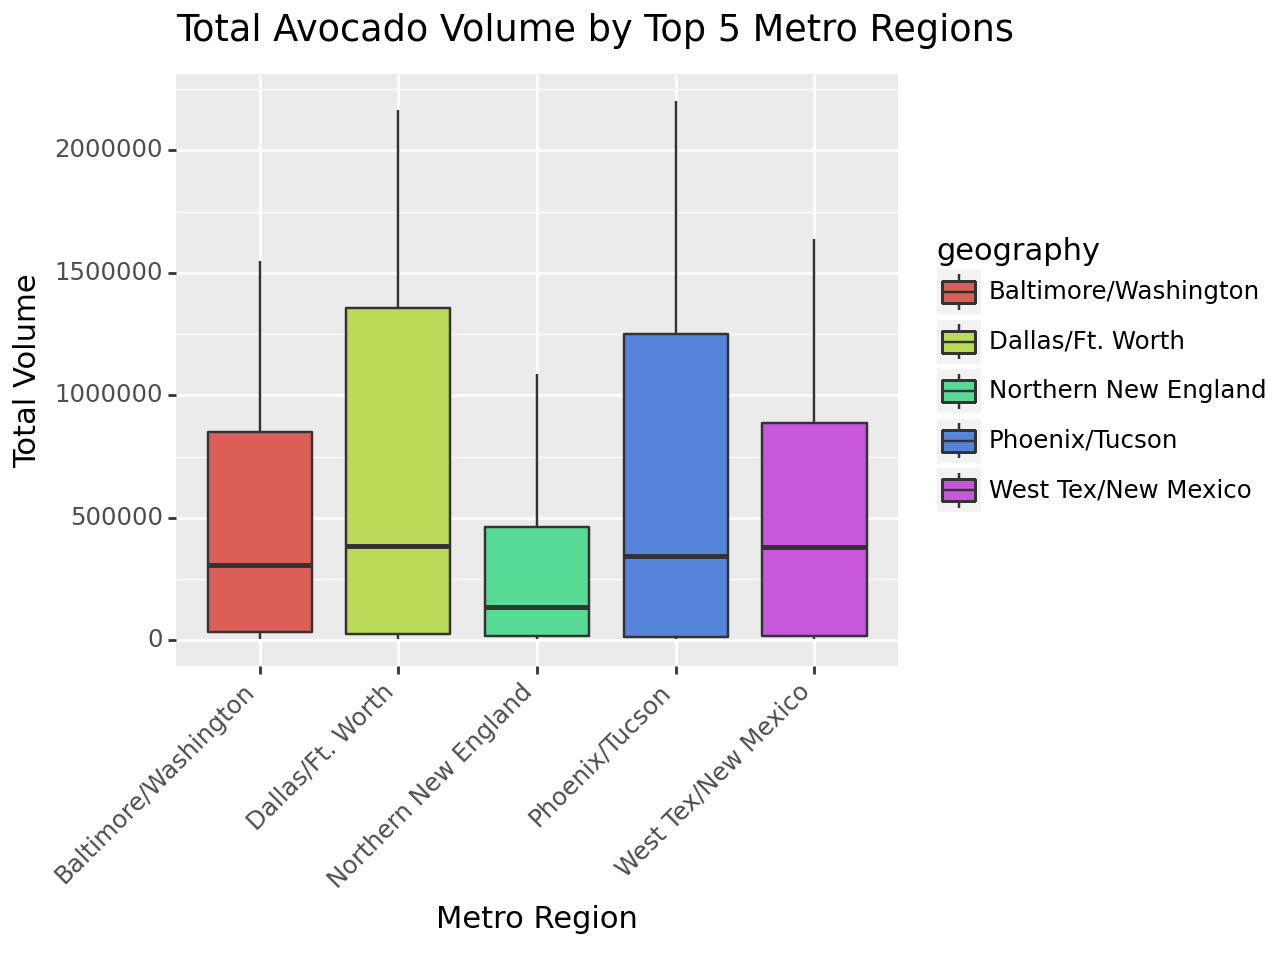

<Figure Size: (640 x 480)>

In [175]:
#Group by Metro Region average total volume
avovolume_metroregion = avocado_metroregion.groupby("geography")["total_volume"].mean().reset_index()
# Sort by average total volume
top5avgvolume = avovolume_metroregion.sort_values(by="total_volume", ascending=False).head(5)

# Filter the dataset to include only data for the top five regions
filtered_avo = avocado_metroregion[avocado_metroregion["geography"].isin(top5avgvolume["geography"])]

# Create plot
region_volume_plot = (
    ggplot(filtered_avo, aes(x="geography", y="total_volume",fill = "geography"))
    + geom_boxplot()
    + labs(title="Total Avocado Volume by Top 5 Metro Regions",
           x="Metro Region",
           y="Total Volume")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

region_volume_plot


## California Specific Analysis

From our cleaned dataset, we are going to narrow down our analysis to avocado sales specificly in California

In [140]:
#Create a data set with only the California Regions
avocado_cali = avocado_clean[avocado_clean['geography'].isin(['San Francisco', 'San Diego', 'Sacramento', 'Los Angeles'])]

Let's see in which California regions is the price of organic versus conventional avocados most different? 

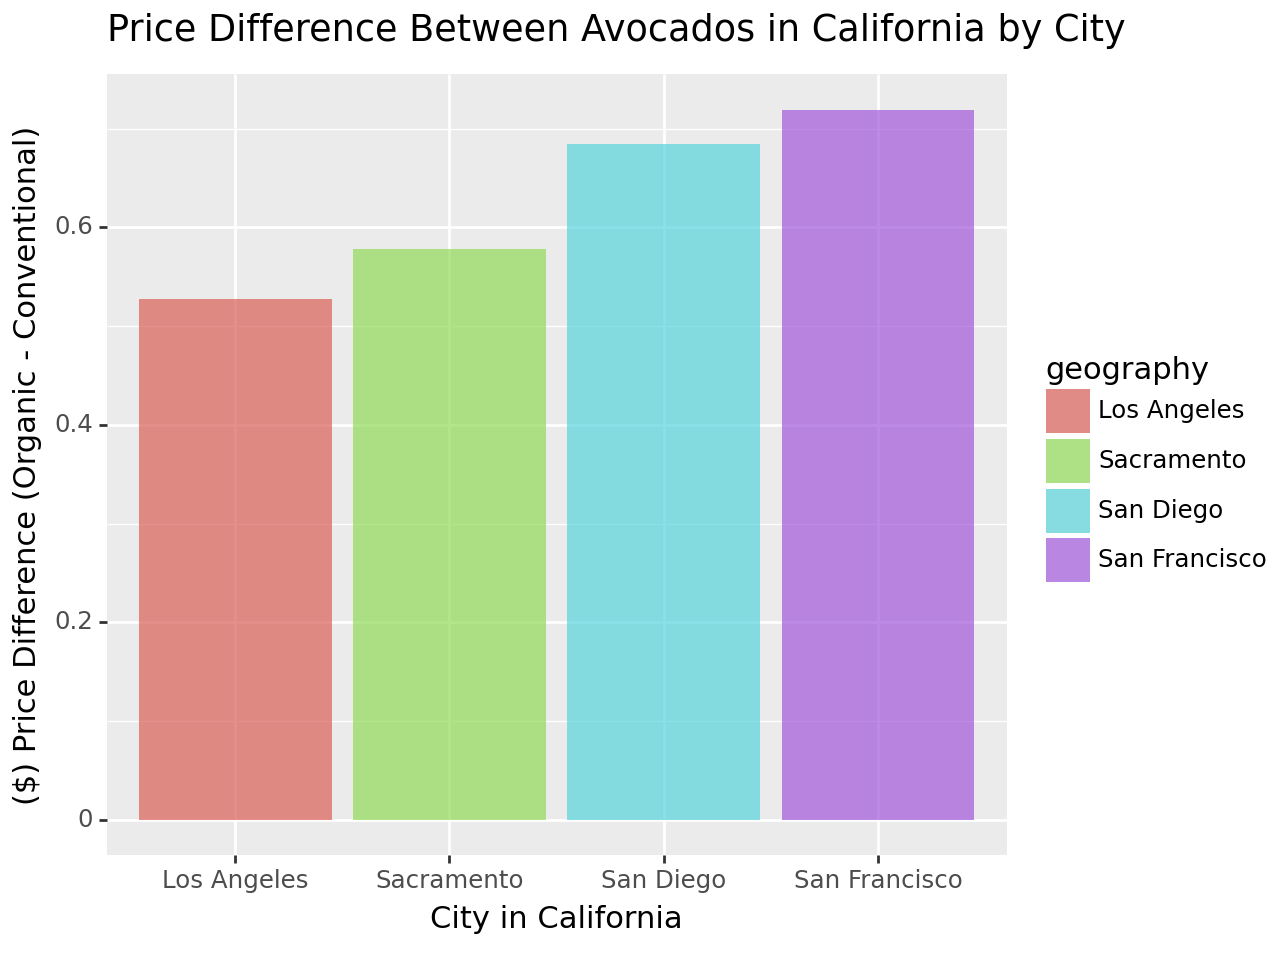

<Figure Size: (640 x 480)>

In [180]:
#Filter for seperate dataframes
cali_organic = avocado_cali[avocado_cali["type"]=="organic"]
cali_conventional = avocado_cali[avocado_cali["type"]=="conventional"]

# Calculate summary statistics for organic and conventional avocado prices by geography
cali_organic_stat = cali_organic.groupby("geography")["average_price"].mean().reset_index()
cali_conventional_stat = cali_conventional.groupby("geography")["average_price"].mean().reset_index()

# Merge the organic and conventional summaries
cali_merge = merge(cali_organic_stat, cali_conventional_stat, on="geography", suffixes=("_organic", "_conventional"))

# Calculate the price difference between organic and conventional avocados
cali_merge["price_difference"] = cali_merge['average_price_organic'] - cali_merge['average_price_conventional']

# Create a bar plot to visualize the price difference
cali_price_plot = (
    ggplot(summary_df, aes(x="geography", y="price_difference",fill="geography")) +
    geom_bar(stat="identity",alpha=0.7) +
    theme(axis_text_x=element_text(angle=0, hjust=0.5)) +
    labs(x='City in California', y='($) Price Difference (Organic - Conventional)',
         title="Price Difference Between Avocados in California by City")
)
cali_price_plot


In [169]:
cali_merge

,geography,average_price_organic,average_price_conventional,price_difference
0,Los Angeles,1.57,1.05,0.53
1,Sacramento,1.87,1.30,0.58
2,San Diego,1.80,1.11,0.68
3,San Francisco,2.12,1.40,0.72


San Francisco has the largest price difference on average between organic and conventional avocados on average.

In [220]:
#Rename columns for graph
avocado_cali_8 = avocado_cali.rename(columns={("small_avo"): "Small",
                                              "large_avo": "Large",
                                              "xl_avo": "Xlarge"})
#Convert to long to add column for size
avo_cali_long = melt(avocado_cali_8, id_vars=["geography","type"],
                    value_vars=["Small","Large","Xlarge"],var_name="size",value_name="amount")

#Calculate average after grouping by city, type, and size
avo_cali_long = avo_cali_long.groupby(["geography","type","size"]).mean()

#Convert back to df reset index
avo_cali_long = avo_cali_long.reset_index()

avo_cali_long.head()

,geography,type,size,amount
0,Los Angeles,conventional,Large,443842.31
1,Los Angeles,conventional,Small,1172952.34
2,Los Angeles,conventional,Xlarge,97073.64
3,Los Angeles,organic,Large,20804.22
4,Los Angeles,organic,Small,14442.06


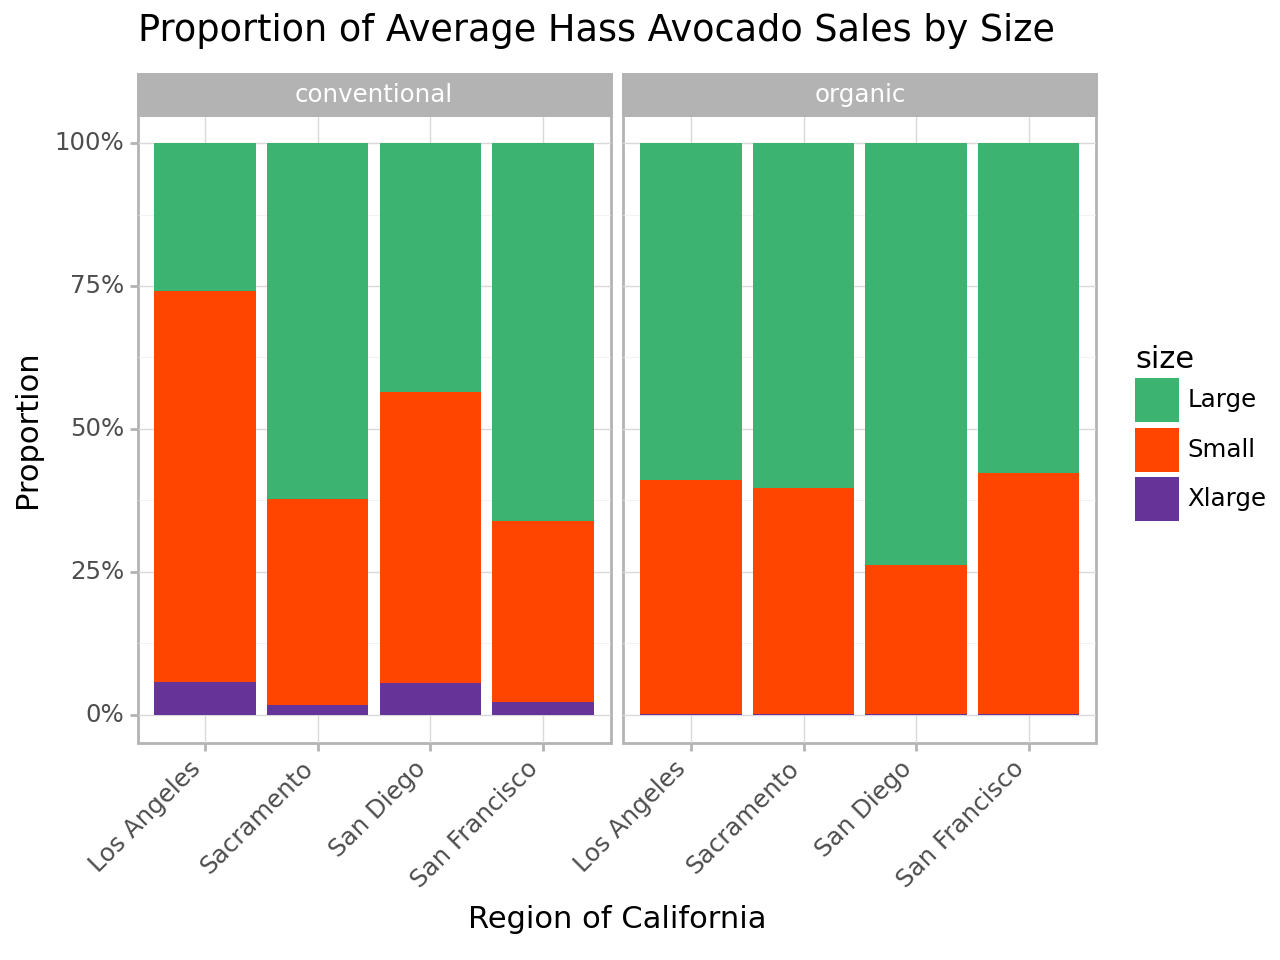

<Figure Size: (640 x 480)>

In [259]:
#Define colors for plot
size_colors = {
    'Small': 'orangered',
    'Large': 'mediumseagreen',
    'Xlarge': 'rebeccapurple',
}
#Create Plot
avosales_size = (
ggplot(avo_cali_long) + geom_col(aes(x="geography",y="amount",fill="size"),position="fill")
    + facet_wrap("type") 
    + scale_fill_manual(values = size_colors)
    + labs(x='Region of California',y='Proportion',title="Proportion of Average Hass Avocado Sales by Size")
    + scale_y_continuous(labels=["0%","25%","50%","75%","100%"])
    + theme_light()
    + theme(axis_text_x=element_text(rotation=45, hjust=1)) 
       
)

avosales_size